# Imports

In [1]:
import numpy as np
import os
import pandas as pd
import plotnine as gg
gg.theme_set(gg.theme_classic)

## Directories etc.

In [2]:
data_save_path = "C:/Users/maria/MEGAsync/SLCNdata/Meta/all_data"
plot_save_path = "C:/Users/maria/MEGAsync/SLCN/MetaSLCNPlots"
if not os.path.exists(plot_save_path):
    os.makedirs(plot_save_path)

# Get data

In [3]:
all_data = pd.read_csv(os.path.join(data_save_path, 'all_data.csv'), index_col=0)
all_data_z = pd.read_csv(os.path.join(data_save_path, 'all_data_z.csv'), index_col=0)
all_data_long = pd.read_csv(os.path.join(data_save_path, 'all_data_long.csv'), index_col=0)
all_data_long_z = pd.read_csv(os.path.join(data_save_path, 'all_data_long_z.csv'), index_col=0)

# Descriptives

## Sample age distribution

Number of participants: 247


C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 4 x 2 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/SLCN/MetaSLCNPlots\0_AgegroupHistogram.png
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\stats\stat_bin.py:93: PlotnineWarning: 'stat_bin()' using 'bins = 6'. Pick better value with 'binwidth'.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\stats\stat_bin.py:93: PlotnineWarning: 'stat_bin()' using 'bins = 6'. Pick better value with 'binwidth'.


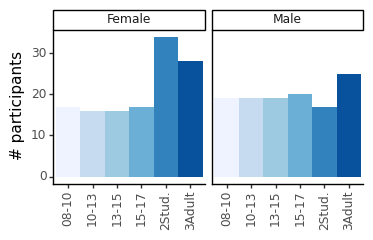

<ggplot: (134979066799)>

In [20]:
print("Number of participants: {}".format(all_data.shape[0]))

gg.options.figure_size = (4, 2)
g = (gg.ggplot(all_data, gg.aes('age_group_', fill='factor(age_group_)'))
     + gg.stat_bin()
     + gg.theme(axis_text_x=gg.element_text(rotation=90, hjust=0.5), legend_position='none')
     + gg.labs(x='', y='# participants', fill='')
     + gg.facet_grid('~ sex')
     + gg.scale_fill_brewer()
)
g.save(os.path.join(plot_save_path, '0_AgegroupHistogram.png'))
g

## Distributions of all features

C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 20 x 20 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/SLCN/MetaSLCNPlots\0_FeatureDistributions.png
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\facets\facet.py:549: PlotnineWarning: If you need more space for the x-axis tick text use ... + theme(subplots_adjust={'wspace': 0.25}). Choose an appropriate value for 'wspace'.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\facets\facet.py:555: PlotnineWarning: If you need more space for the y-axis tick text use ... + theme(subplots_adjust={'hspace': 0.25}). Choose an appropriate value for 'hspace'
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\facets\facet.py:549: PlotnineWarning: If you need more space for the x-axis tick text use ... + theme(subplots_adjust={'wspace': 0.25}). Ch

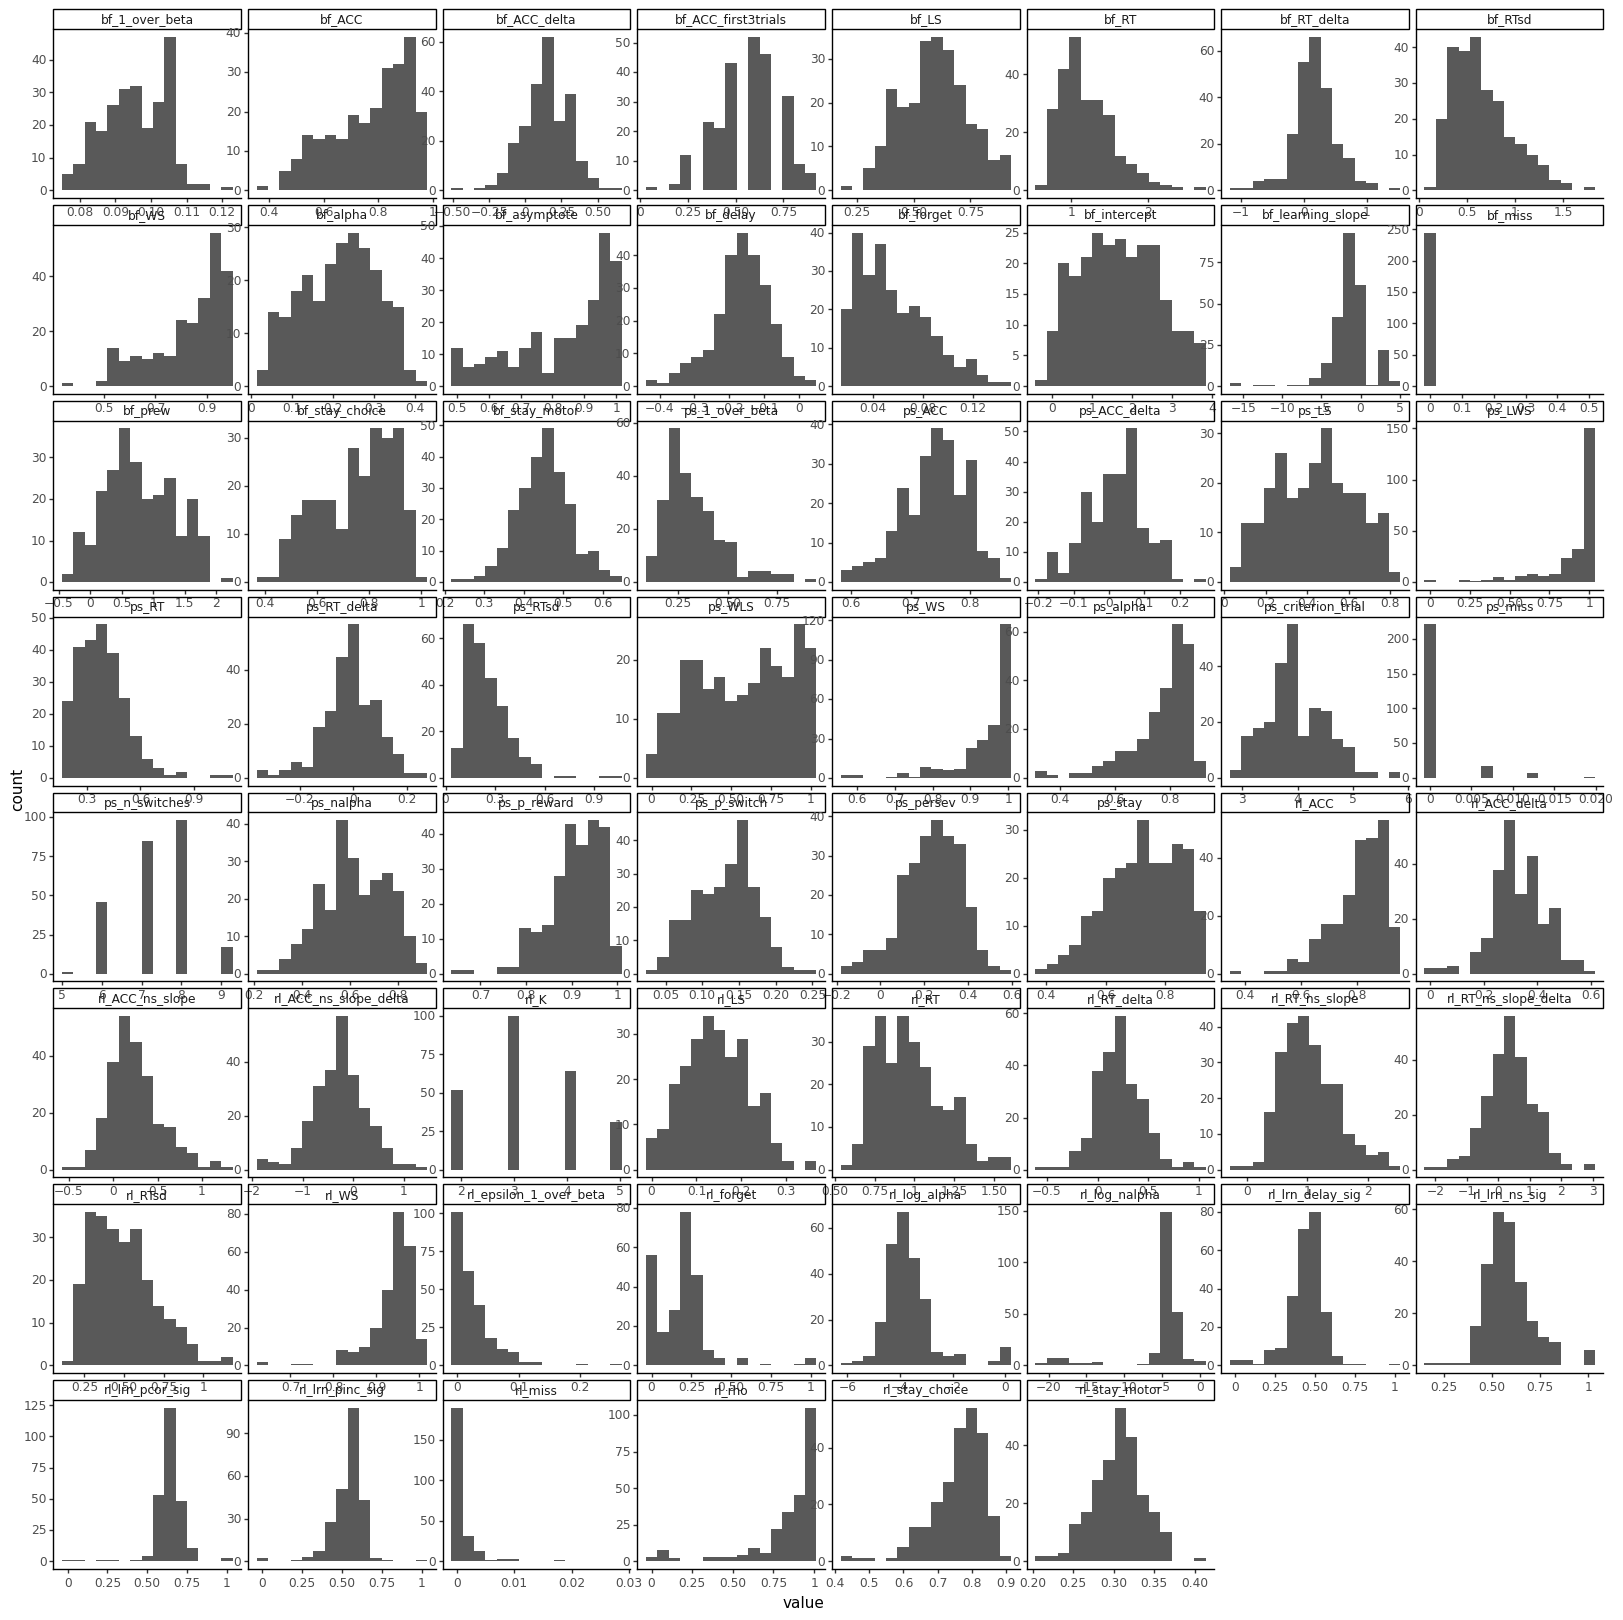

<ggplot: (134978468708)>


In [5]:
gg.options.figure_size = (20, 20)

g = (gg.ggplot(all_data_long, gg.aes('value'))
     + gg.geom_histogram(bins=15)
     + gg.facet_wrap('~ feature', scales='free')
    )
g.save(os.path.join(plot_save_path, '0_FeatureDistributions.png'))
print(g)

C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 10 x 10 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/SLCN/MetaSLCNPlots\0_FeatureMeans.png
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\facets\facet.py:555: PlotnineWarning: If you need more space for the y-axis tick text use ... + theme(subplots_adjust={'hspace': 0.25}). Choose an appropriate value for 'hspace'
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\facets\facet.py:555: PlotnineWarning: If you need more space for the y-axis tick text use ... + theme(subplots_adjust={'hspace': 0.25}). Choose an appropriate value for 'hspace'


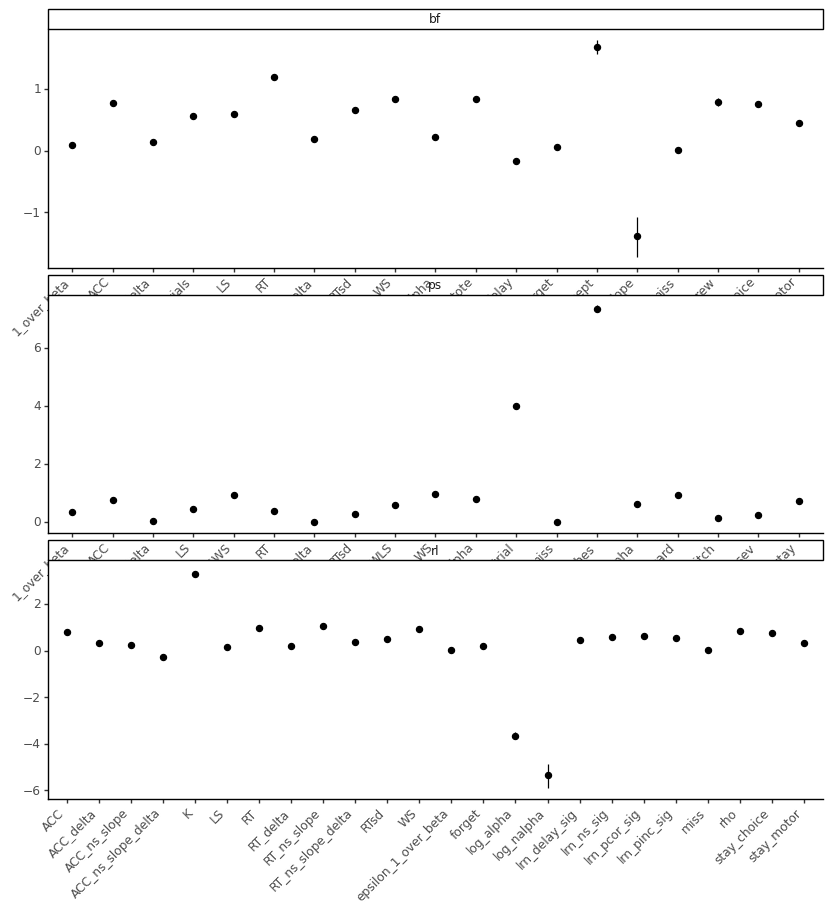

<ggplot: (134980182426)>

In [6]:
# Mean of each feature
gg.options.figure_size = (10, 10)
g = (gg.ggplot(all_data_long, gg.aes('param', 'value'))
     + gg.stat_summary()
     + gg.labs(x='', y='')
     + gg.theme(axis_text_x=gg.element_text(rotation=45, hjust=1))
     + gg.facet_wrap('~ task', scales='free', ncol=1)
    )
g.save(os.path.join(plot_save_path, '0_FeatureMeans.png'))
g